# Set Up

In [1]:
import pandas
import pandas as pd
from datetime import datetime
# read in CSV
RAW_DF = pd.read_csv('surveyresponses2021.csv') # this year's responses (2021 data)
OLD_DF = pd.read_csv('2020-wics-advocacy-survey-responses.csv') # last year's responses

In [2]:
# DATA CLEANING

# drop metadata columns
CLEAN_DF = RAW_DF.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage'])
OLD_DF = OLD_DF.drop(columns=['StartDate', 'EndDate', 'Status', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage'])
# create question key
QUESTION_KEY = CLEAN_DF.drop(range(1, CLEAN_DF.shape[0])).to_dict()
# drop metadata rows
CLEAN_DF = CLEAN_DF.drop([0, 1])

# standardize expected graduation date with datetime
DATETIME_COL = pd.to_datetime(CLEAN_DF['Q2'], errors='coerce')
DATETIME_COL[DATETIME_COL.isna()] = pd.to_datetime(CLEAN_DF['Q2'][DATETIME_COL.isna()], format='%M/%y')
# add column with expected graduation date as datetime
CLEAN_DF['Q2_DT'] = DATETIME_COL
# drop responses for respondents outside of graduation date range
CLEAN_DF = CLEAN_DF[(datetime(2021, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2026, 8, 31))]

In [3]:
# CONSTANTS

# schools
ARTS_HUMANITIES = ['Art, Film, and Visual Studies', 'Classics', 'Comparative Literature', 'East Asian Studies', 'English', 'Folklore and Mythology', 'Germanic Languages and Literatures', 'History and Literature', 'History of Art and Architecture', 'Linguistics', 'Music', 'Near Eastern Languages and Civilizations', 'Philosophy', 'Religion, Comparative Study of', 'Romance Languages and Literatures', 'Slavic Languages and Literatures', 'South Asian Studies', 'Theater, Dance, & Media']
SOCIAL_SCIENCES = ['African and African American Studies', 'Anthropology', 'Economics', 'Environmental Science and Public Policy', 'Government', 'History', 'History and Science', 'Psychology', 'Social Studies', 'Sociology', 'Women, Gender, and Sexuality, Study of']
PURE_SCIENCES = ['Astrophysics', 'Chemical and Physical Biology', 'Chemistry', 'Chemistry and Physics', 'Earth and Planetary Sciences', 'Human Developmental and Regenerative Biology', 'Human Evolutionary Biology', 'Integrative Biology', 'Mathematics', 'Molecular and Cellular Biology', 'Neuroscience', 'Physics', 'Statistics']
SEAS = ['Applied Mathematics', 'Biomedical Engineering', 'Computer Science', 'Electrical Engineering', 'Engineering Sciences', 'Environmental Science and Engineering', 'Mechanical Engineering']
UNDECIDED = ['Undecided']
NONE = ['None']

# class year
FIRSTYEAR = (datetime(2024, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2025, 8, 31))
SOPHOMORE = (datetime(2023, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2024, 8, 31))
JUNIOR = (datetime(2022, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2023, 8, 31))
SENIOR = (datetime(2021, 9, 1) <= CLEAN_DF['Q2_DT']) & (CLEAN_DF['Q2_DT'] <= datetime(2022, 8, 31))

# gender identity
MALE = ['Man']
NONMALE = ['Woman', 'Non-binary']

# sexual orientation
STRAIGHT = ['Straight/Heterosexual']
NONSTRAIGHT = ['Queer', 'Questioning or unsure']

# diagnosed with disability/impairment
DIAGNOSED = ['Yes, I have been diagnosed with a disability or impairment']
NONDIAGNOSED = ['No, I have not been diagnosed with a disability or impairment']


In [4]:
# LIKERT SCALES

LIKERT_KNOWLEDGE_KEY = {
    'Significantly less knowledgeable' : 1,
    'Less knowledgeable' : 2,
    'Slightly less knowledgeable' : 3,
    'Similarly knowledgeable' : 4,
    'Slightly more knowledgeable' : 5,
    'More knowledgeable' : 6,
    'Significantly more knowledgeable' : 7
}

LIKERT_AGREEMENT_KEY = {
    'Strongly disagree' : 1,
    'Disagree' : 2,
    'Somewhat disagree' : 3,
    'Neither agree nor disagree' : 4,
    'Somewhat agree' : 5,
    'Agree' : 6,
    'Strongly agree' : 7
}

# Demo

### Question key

In [5]:
# Question key, maps question ID to question text
print(QUESTION_KEY['Q1'][0])
CLEAN_DF.head()

What is your intended concentration?

If you are a joint concentrator, select your primary concentration. If you are undeclared, you may still select an intended concentration.


,Q1,Q2,Q3,Q4,Q5,Q6,Q6_5_TEXT,Q7_1,Q7_2,Q7_3,...,Q31,Q32,Q33,Q33_8_TEXT,Q34,Q35,Q36,Q37,Q37_4_TEXT,Q2_DT
2,Computer Science,06/2025,Yes,Computer Science,My first-year academic advisor,In high school (including summer after graduat...,NaN,4,3,2,...,No,Straight/Heterosexual,White,NaN,"No, not of Hispanic or Latinx origin",No,Yes,"No, I have not been diagnosed with a disabilit...",NaN,2025-06-01
3,Computer Science,05/2025,Yes,Computer Science,NaN,In high school (including summer after graduat...,NaN,5,3,4,...,No,Straight/Heterosexual,Asian,NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2025-05-01
4,Undecided,05/2024,No,"Art, Film, and Visual Studies,Comparative Lite...","Department heads,Department faculty,Department...",I have never been taught programming or comput...,NaN,NaN,NaN,NaN,...,Prefer not to say,Queer,Asian,NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2024-05-01
5,Physics,05/2024,Yes,Physics,"Residential advising resources, such as house ...",In college,NaN,NaN,NaN,NaN,...,No,Questioning or unsure,"Asian,Native Hawaiian or Other Pacific Islander",NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2024-05-01
6,Applied Mathematics,05/2024,Yes,"Applied Mathematics,Economics",NaN,In high school (including summer after graduat...,NaN,NaN,NaN,NaN,...,No,Questioning or unsure,Asian,NaN,"No, not of Hispanic or Latinx origin",No,No,"No, I have not been diagnosed with a disabilit...",NaN,2024-05-01


### Filter by concentration/secondary

In [6]:
# All primary SEAS concentrators
CLEAN_DF[CLEAN_DF['Q1'].isin(SEAS)].shape

(63, 77)

In [7]:
# All decided concentrators
CLEAN_DF[~(CLEAN_DF['Q1'].isin(UNDECIDED))].shape

(92, 77)

In [8]:
# All CS concentrators
CLEAN_DF[(CLEAN_DF['Q1'] == 'Computer Science')].shape

(53, 77)

### Class year

In [9]:
# All firstyears
CLEAN_DF[FIRSTYEAR].shape

(21, 77)

In [10]:
# All sophomores
CLEAN_DF[SOPHOMORE].shape

(28, 77)

In [11]:
# All juniors
CLEAN_DF[JUNIOR].shape

(28, 77)

In [12]:
# All seniors
CLEAN_DF[SENIOR].shape

(17, 77)

### Has enrolled in CS course

In [13]:
# All undergraduates who have enrolled in a CS course
CLEAN_DF[CLEAN_DF['Q3'] == 'Yes'].shape

(79, 77)

### Gender identity

In [14]:
# All male respondents
CLEAN_DF[CLEAN_DF['Q30'].isin(MALE)].shape

(18, 77)

In [15]:
# All female, non-binary/third gender, agender, and genderqueer respondents
CLEAN_DF[CLEAN_DF['Q30'].isin(NONMALE)].shape

(73, 77)

### BGLTQ+

In [16]:
# All BGLTQ+ respondents
CLEAN_DF[CLEAN_DF['Q32'].isin(NONSTRAIGHT)].shape

(31, 77)

In [17]:
# All non BGLTQ+ respondents
CLEAN_DF[CLEAN_DF['Q32'].isin(STRAIGHT)].shape

(60, 77)

### Race and ethnicity

In [18]:
# All White respondents
CLEAN_DF[CLEAN_DF['Q33'].str.contains('White', na=False)].shape

(30, 77)

In [19]:
# All Asian respondents
CLEAN_DF[CLEAN_DF['Q33'].str.contains('Asian', na=False)].shape

(66, 77)

In [20]:
# All Black respondents
CLEAN_DF[CLEAN_DF['Q33'].str.contains('Black or African American', na=False)].shape

(4, 77)

In [21]:
# All Hispanic / Latinx respondents
CLEAN_DF[CLEAN_DF['Q34'] == 'Yes, of Hispanic or Latinx origin'].shape

(3, 77)

### FGLI (first generation, low income)

In [22]:
# All first generation respondents
CLEAN_DF[CLEAN_DF['Q35'] == 'Yes'].shape

(9, 77)

In [23]:
# All low income respondents
CLEAN_DF[CLEAN_DF['Q36'] == 'Yes'].shape

(14, 77)

### Diagnosed with disability/impairment

In [24]:
# All respondents diagnosed with a disability or impairment
CLEAN_DF[CLEAN_DF['Q37'].isin(DIAGNOSED)].shape

(8, 77)

In [25]:
# All respondents not diagnosed with a disability or impairment
CLEAN_DF[CLEAN_DF['Q37'].isin(NONDIAGNOSED)].shape

(76, 77)

# Your Turn!

For each question, consider how the responses vary based on each of the following factors:
* School (SEAS, Arts/Humanties, Social Sciences, Pure Sciences) where applicable
* Class year
* Gender identity
* BGLTQ+
* Race and ethnicity
* FGLI (first generation, low income)
* Disability

Be sure to consider combinations of factors as well (ex: Gender Identity + Race/Ethnicity). Ensure that n > 5 for all population groups.

### Section 1 (Q4, Q5, Q6, Q7) - Ivy

In [26]:
print(QUESTION_KEY['Q6'][0])

Q6_OPTIONS = [
    'In middle school (including summer after graduation)',
    'In high school (including summer after graduation)',
    'In college',
    'I have never been taught programming or computer science in an academic or extracurricular program'
]

# CLEAN_DF['Q6']

If you have been taught programming or computer science through an academic or extracurricular program, when did you enroll in your first course? - Selected Choice


In [27]:
print(QUESTION_KEY['Q9'][0])

# add column with expected programming experience years as number
CLEAN_DF['Q9_NUM'] = pd.to_numeric(CLEAN_DF['Q9'], errors='ignore')

# CLEAN_DF['Q9_NUM']

KeyError: 'Q9'

In [ ]:
print(QUESTION_KEY['Q10_1'][0])

# add column with likert scale as number
CLEAN_DF['Q10_1_NUM'] = CLEAN_DF['Q10_1'].map(LIKERT_KNOWLEDGE_KEY)
# filter CS concentrators
CS_CON_DF = CLEAN_DF[(CLEAN_DF['Q1'] == 'Computer Science') | (CLEAN_DF['Q2'] == 'Computer Science')]

# CS_CON_DF['Q10_1_NUM']

In [ ]:
print(QUESTION_KEY['Q11_1'][0])

# add column with likert scale as number
CLEAN_DF['Q11_1_NUM'] = CLEAN_DF['Q11_1'].map(LIKERT_AGREEMENT_KEY)
# filter CS concentrators
CS_CON_DF = CLEAN_DF[(CLEAN_DF['Q1'] == 'Computer Science') | (CLEAN_DF['Q2'] == 'Computer Science')]

# CS_CON_DF['Q11_1_NUM']

### Section 2 (Q8, Q9, Q10, Q11)

In [74]:
MALE_DF = CLEAN_DF[CLEAN_DF['Q30'].isin(MALE)]
NONMALE_DF = CLEAN_DF[CLEAN_DF['Q30'].isin(NONMALE)]
NONSTRAIGHT_DF = CLEAN_DF[CLEAN_DF['Q32'].isin(NONSTRAIGHT)]
STRAIGHT_DF = CLEAN_DF[CLEAN_DF['Q32'].isin(STRAIGHT)]
WHITE_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('White', na=False)]
ASIAN_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Asian', na=False)]
BLACK_DF = CLEAN_DF[CLEAN_DF['Q33'].str.contains('Black or African American', na=False)]
HISPANIC_DF = CLEAN_DF[CLEAN_DF['Q34'] == 'Yes, of Hispanic or Latinx origin']
FGLI_DF = CLEAN_DF[(CLEAN_DF['Q35'] == 'Yes') | (CLEAN_DF['Q36'] == 'Yes')]
NONFGLI_DF = CLEAN_DF[(CLEAN_DF['Q35'] == 'No') & (CLEAN_DF['Q36'] == 'No')]
DIS_DF = CLEAN_DF[CLEAN_DF['Q37'].isin(DIAGNOSED)]
NONDIS_DF = CLEAN_DF[CLEAN_DF['Q37'].isin(NONDIAGNOSED)]

df_list = {'Male': MALE_DF, 'Nonmale': NONMALE_DF, 'Nonstraight': NONSTRAIGHT_DF, 'Straight': STRAIGHT_DF,
          'White': WHITE_DF, 'Asian': ASIAN_DF, 'Black': BLACK_DF, 'Hispanic': HISPANIC_DF,
          'FGLI': FGLI_DF, 'NONFGLI_DF': NONFGLI_DF, 'DIS_DF': DIS_DF, 'NONDIS_DF': NONDIS_DF}

In [80]:
CLEAN_DF['Q8_1'] = CLEAN_DF['Q8_1'].astype('float')
CLEAN_DF['Q8_2'] = CLEAN_DF['Q8_2'].astype('float')
CLEAN_DF['Q8_3'] = CLEAN_DF['Q8_3'].astype('float')

gender = 'Q30'
race = 'Q33'
sexual_orientation = 'Q32'

In [75]:
print(QUESTION_KEY['Q8_1'][0])

Please indicate the extent to which you disagree or agree with each of the following statements: I am interested in CS because ... (1 - strongly disagree, 4- neither agree nor disagree, 7 - strongly agree) - I enjoy collaborating on problems with others in the CS community.


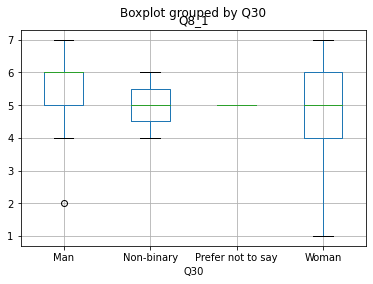

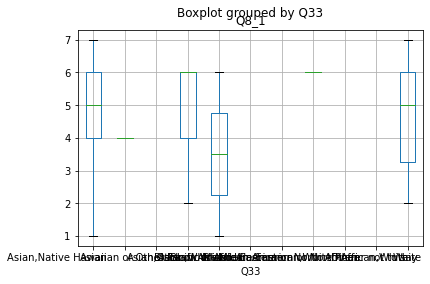

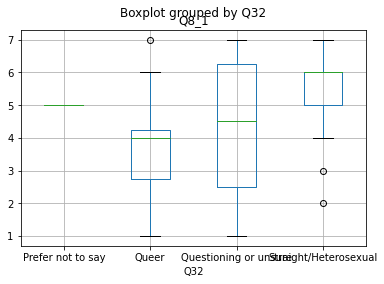

In [79]:
boxplot1 = CLEAN_DF.boxplot(column=['Q8_1'], by=gender)
boxplot2 = CLEAN_DF.boxplot(column=['Q8_1'], by=race)
boxplot3 = CLEAN_DF.boxplot(column=['Q8_1'], by=sexual_orientation)

In [55]:
print(QUESTION_KEY['Q8_2'][0])

Please indicate the extent to which you disagree or agree with each of the following statements: I am interested in CS because ... (1 - strongly disagree, 4- neither agree nor disagree, 7 - strongly agree) - I enjoy being creative and coming up with new ways to solve problems.


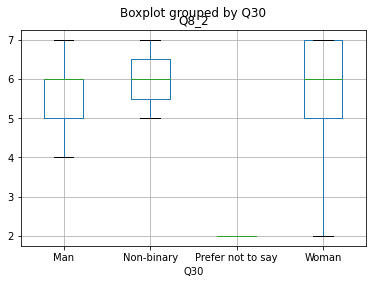

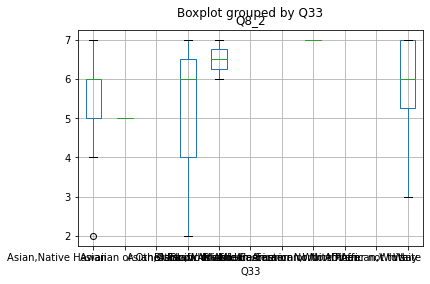

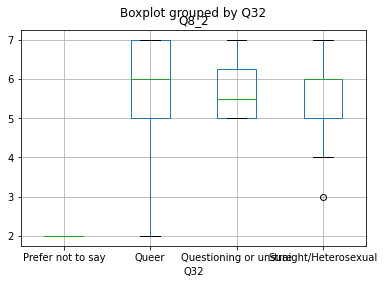

In [81]:
boxplot1 = CLEAN_DF.boxplot(column=['Q8_2'], by=gender)
boxplot2 = CLEAN_DF.boxplot(column=['Q8_2'], by=race)
boxplot3 = CLEAN_DF.boxplot(column=['Q8_2'], by=sexual_orientation)

In [57]:
print(QUESTION_KEY['Q8_3'][0])

Please indicate the extent to which you disagree or agree with each of the following statements: I am interested in CS because ... (1 - strongly disagree, 4- neither agree nor disagree, 7 - strongly agree) - I enjoy the job security that comes with CS.


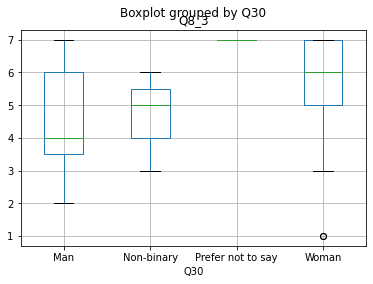

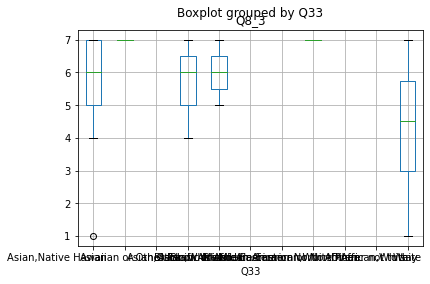

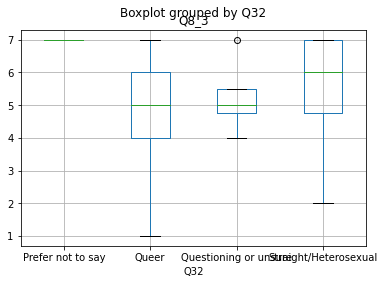

In [82]:
boxplot1 = CLEAN_DF.boxplot(column=['Q8_3'], by=gender)
boxplot2 = CLEAN_DF.boxplot(column=['Q8_3'], by=race)
boxplot3 = CLEAN_DF.boxplot(column=['Q8_3'], by=sexual_orientation)

In [83]:
CLEAN_DF['Q9_1'] = CLEAN_DF['Q9_1'].astype('float')
CLEAN_DF['Q9_2'] = CLEAN_DF['Q9_2'].astype('float')
CLEAN_DF['Q9_3'] = CLEAN_DF['Q9_3'].astype('float')
CLEAN_DF['Q9_4'] = CLEAN_DF['Q9_4'].astype('float')
CLEAN_DF['Q9_5'] = CLEAN_DF['Q9_5'].astype('float')

gender = 'Q30'
race = 'Q33'
sexual_orientation = 'Q32'

In [37]:
print(QUESTION_KEY['Q9_1'][0])

Please indicate the extent to which you disagree or agree with each of the following statements: For a course within my primary concentration department, I feel comfortable (1 - strongly disagree, 4 - neither agree nor disagree, 7 - strongly agree) - Asking or answering questions during lecture


(14, 79)

In [58]:
print(QUESTION_KEY['Q9_2'][0])




Please indicate the extent to which you disagree or agree with each of the following statements: For a course within my primary concentration department, I feel comfortable (1 - strongly disagree, 4 - neither agree nor disagree, 7 - strongly agree) - Asking or answering questions during sections


In [59]:
print(QUESTION_KEY['Q9_3'][0])




Please indicate the extent to which you disagree or agree with each of the following statements: For a course within my primary concentration department, I feel comfortable (1 - strongly disagree, 4 - neither agree nor disagree, 7 - strongly agree) - Asking or answering questions during office hours


In [60]:
print(QUESTION_KEY['Q9_4'][0])




Please indicate the extent to which you disagree or agree with each of the following statements: For a course within my primary concentration department, I feel comfortable (1 - strongly disagree, 4 - neither agree nor disagree, 7 - strongly agree) - Asking or answering questions in an online forum (ex: Canvas, Piazza, Ed)


In [61]:
print(QUESTION_KEY['Q9_5'][0])




Please indicate the extent to which you disagree or agree with each of the following statements: For a course within my primary concentration department, I feel comfortable (1 - strongly disagree, 4 - neither agree nor disagree, 7 - strongly agree) - Privately asking the teaching staff questions


In [62]:
print(QUESTION_KEY['Q10'][0])




Please indicate which of the following statements you agree with: 
I would feel comfortable approaching at least one faculty member from within my primary concentration department... Select all that apply.


In [63]:
print(QUESTION_KEY['Q11_1'][0])




Please indicate the extent to which you disagree or agree with each of the following statements: the aspects of my identity that are important to me, such as gender, ethnicity, or sexuality, are adequately represented among ... (1 - strong disagree, 4 - neither agree nor disagree, 7 - strongly agree) - the students in my primary concentration department


In [64]:
print(QUESTION_KEY['Q11_2'][0])




Please indicate the extent to which you disagree or agree with each of the following statements: the aspects of my identity that are important to me, such as gender, ethnicity, or sexuality, are adequately represented among ... (1 - strong disagree, 4 - neither agree nor disagree, 7 - strongly agree) - the teaching staff for courses in my primary concentration department


In [65]:
print(QUESTION_KEY['Q11_3'][0])




Please indicate the extent to which you disagree or agree with each of the following statements: the aspects of my identity that are important to me, such as gender, ethnicity, or sexuality, are adequately represented among ... (1 - strong disagree, 4 - neither agree nor disagree, 7 - strongly agree) - the professors in my primary concentration department


### Section 3 (Q12, Q13, Q14, Q15, Q21)

In [ ]:
print(QUESTION_KEY['Q12'][0])

Q12_OPTIONS = [
    'CS 1: Great Ideas in Computer Science',
    'CS 1: Great Ideas in Computer Science',
    'CS 10: Elements of Data Science',
    'CS 20: Discrete Mathematics for Computer Science',
    'CS 50: Introduction to Computer Science I',
    'CS 51: Introduction to Computer Science II',
    'CS 61: Systems Programming and Machine Organization',
    'CS 121: Introduction to Theoretical Computer Science',
    'CS 124: Data Structures and Algorithms',
    'CS 9x, an undergraduate-level research CS course',
    'CS 12x, an undergraduate-level theoretical CS course (other than CS 121 or CS 124)',
    'CS 13x, an undergraduate-level economics/computation course',
    'CS 14x, an undergraduate-level networks course',
    'CS 15x, an undergraduate-level programming languages course',
    'CS 16x, an undergraduate-level systems course',
    'CS 17x, an undergraduate-level graphics/visualization/user interfaces course',
    'CS 18x, an undergraduate-level artificial intelligence course',
    'CS 10x, an undergraduate-level miscellaneous course',
    'CS 22x, a graduate-level theoretical computer science course',
    'CS 23x, a graduate-level economics/computation course',
    'CS 24x, a graduate-level networks course',
    'CS 25x, a graduate-level programming languages course',
    'CS 26x, a graduate-level systems course',
    'CS 27x, a graduate-level graphics/visualization/user interfaces course',
    'CS 28x, a graduate-level artificial intelligence course',
    'CS 20x, a graduate-level miscellaneous course'
]

# filter undergraduates who have taken a CS course
TAKEN_CS_DF = CLEAN_DF[CLEAN_DF['Q5'] == 'Yes']

# TAKEN_CS_DF['Q17']

### Section 4 (Q16, Q17, Q18, Q19, Q20) - Saba

### Section 5 (Q22, Q23, Q24, Q25) - Catherine

### Section 6 (Q26, Q27, Q28, Q29) - Alyssa